### <div class="alert alert-block alert-info"> [Part1] openCV 이미지 마우스 드래그하여 좌표값 알기
- https://house-of-e.tistory.com/entry/9-OpenCV-python-%EB%A7%88%EC%9A%B0%EC%8A%A4-%EB%8F%99%EC%9E%91-%ED%95%A8%EC%88%98-setMouseCallback

#### 참고
- 지우는 기능은 없음 -> 배경색과 같은 색으로 덮어버리는 것 뿐

In [5]:
## 마우스로 원 그리기
import cv2
import numpy as np
import matplotlib.pyplot as plt # matplot으로도 확인 가능하지만 cv2와 다른 점은 그릴 수 없음.


# img = np.full((300, 300, 3), 255, dtype= np.uint8)  # 300,300짜리를 모두 255로 채움-> 흰색. uint-> 255까지
img = np.zeros((300, 300, 3), dtype=np.uint8)  
img[:, :, :] = 255   # 위의 np.full~과 같은 코드
# img[0]
# np.min(img), np.max(img)


title = 'Mouse Event'
cv2.imshow(title, img)

def Mouse(event, x, y, flag, param):
    if event == cv2.EVENT_LBUTTONDOWN:  #왼쪽 버튼 클릭
        cv2.circle(img, (x, y), 15, (255, 0, 0), -1)
        cv2.imshow(title, img)
cv2.setMouseCallback(title, Mouse)


while True:
    if cv2.waitkey()==27:   #ascii 코드 값으로 27을 확인해봐야 함.
        break

cv2.destroyAllWindows()

# plt.imshow()

AttributeError: module 'cv2' has no attribute 'waitkey'

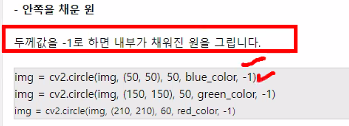

In [ ]:
cv2.circle(img, (150, 150))
import matplotlib.pyplot as plt



In [3]:
import cv2
import numpy as np

# 초기 행과 열 값
rows, cols = 400, 500

# 3채널 이미지 생성
image = np.zeros((rows, cols, 3), dtype=np.uint8)

def draw_circle_rectangle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # 왼쪽 버튼 클릭 시 빨간색 원 그리기
        cv2.circle(image, (x, y), 20, (0, 0, 255), -1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        # 오른쪽 버튼 클릭 시 파란색 사각형 그리기
        cv2.rectangle(image, (x - 20, y - 20), (x + 20, y + 20), (255, 0, 0), -1)
    cv2.imshow('Image', image)

# 창 생성
cv2.namedWindow('Image')

# 마우스 클릭 이벤트 콜백 등록
cv2.setMouseCallback('Image', draw_circle_rectangle)

while True:
    cv2.imshow('Image', image)

    # 'ESC' 키를 누르면 종료
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()


In [7]:
import cv2
import numpy as np

# 초기 행과 열 값
rows, cols = 400, 500

# 3채널 이미지 생성
image = np.zeros((rows, cols, 3), dtype=np.uint8)
background_color = (0, 0, 0)  # 배경색 (검은색)
rectangle_color = (255, 0, 0)  # 파란색 사각형 색상
circle_color = (0, 0, 255)  # 빨간색 원 색상

# 드래그 시작점과 끝점을 저장하기 위한 변수
start_point = None
end_point = None
drawing = False  # 드래그 중 여부를 나타내는 플래그

def draw_circle_rectangle_fill(event, x, y, flags, param):
    global start_point, end_point, drawing, image

    if event == cv2.EVENT_LBUTTONDOWN:
        # 왼쪽 버튼 클릭 시 시작점 저장
        start_point = (x, y)
        drawing = True
    elif event == cv2.EVENT_LBUTTONUP:
        # 왼쪽 버튼 떼면 끝점 저장하고 원 그리기
        end_point = (x, y)
        if drawing:
            cv2.circle(image, (x, y), 20, circle_color, -1)
        drawing = False
    elif event == cv2.EVENT_RBUTTONDOWN:
        # 오른쪽 버튼 클릭 시 파란색 사각형 그리기
        cv2.rectangle(image, (x - 20, y - 20), (x + 20, y + 20), rectangle_color, -1)
    elif event == cv2.EVENT_MOUSEMOVE:
        # 마우스 이동 중 드래그 중이면 배경색으로 채우기
        if drawing:
            cv2.rectangle(image, start_point, (x, y), background_color, -1)
    cv2.imshow('Image', image)

# 창 생성
cv2.namedWindow('Image')

# 마우스 클릭 이벤트 콜백 등록
cv2.setMouseCallback('Image', draw_circle_rectangle_fill)

while True:
    cv2.imshow('Image', image)

    # 'e' 키를 누르면 드래그한 영역을 배경색으로 채우기
    key = cv2.waitKey(1)
    if key == 27:  # 'ESC' 키를 누르면 종료
        break
    elif key == 101:    # ascii 코드 101은 e
        if start_point and end_point:
            cv2.rectangle(image, start_point, end_point, background_color, -1)

cv2.destroyAllWindows()


### <div class="alert alert-block alert-info"> [Part2] 사용자가 드래그하여 사각형 그리기
-  아래를 실행하면 마우스로 드래그한 영역에 사각형이생성됨
    - 마우스 클릭, 드래그등 어떠한 액션이 있을때 동작하는 작업을 이벤트라함
    - global 함수에 대한 이해가 필요하면   def 함수가 끝나면 변수값이 사라지는 지역변수와, def가 끝나도 변수값이 남아있는 전역변수에 대해 알아야함 
        - https://wikidocs.net/62

-(참고) ASCII코드 <br> 
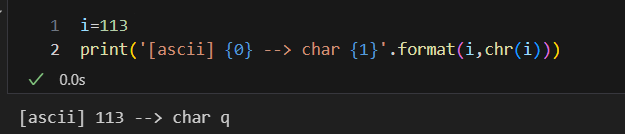



In [2]:
##################################################
###  이 코드는 실행하여 왼쪽버튼을 눌러 드래그 하면 
### 사각형이 생성되고
### c 키를 누르면 원본사진이 다시 불러짐(즉 사각형이 사라짐)
### q 키를 누르면 화면이 종료되면서 사용자가 드래그한 영역이 좌표값으로 표시됨
### 이영역은 '사용자가드래그한영역.csv' 로 저장됨
####################################################

import cv2
import pandas as pd
img_color=cv2.imread('dog.jpg', cv2.IMREAD_COLOR)  

top_left_corner = []                             
bottom_right_corner = []
xy=[]

def drawRectangle(action, x, y, flags, parms):
    global top_left_corner, bottom_right_corner
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        
        
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        
        xy.append([top_left_corner[0], bottom_right_corner[0]])
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0),5)
        cv2.imshow("Window", image)

image = cv2.imread("./dog.jpg")
temp = image.copy()    # 원본이미지에 사각형을 그림으로 미리 백업본을 만들어놓음 
cv2.namedWindow("Window")
cv2.setMouseCallback("Window", drawRectangle)

k = 0

while k != 113:  # ord('q')   # q를 입력하면 종료됨
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    if (k == 99):            # c 를 입력하면 복사하여 원본 보여줌
        image = temp.copy()
        cv2.imshow("Window", image)

cv2.destroyAllWindows()

df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('사용자가드래그한영역.csv')

          top      bottom
0  (322, 313)  (442, 416)
1  (575, 412)  (666, 522)
2  (671, 357)  (763, 407)


### <div class="alert alert-block alert-info"> [Part3] 사용자가 드래그한 영역 모자이크지정
- 모자이크는 그 영역만큼 꺼내서 크기를 크게한뒤 다시 그 크기를 줄여서 원래 크기에 그림을 얹어주어야함.


In [17]:
# %pip install pandas

   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
    --------------------------------------- 0.2/10.5 MB 5.3 MB/s eta 0:00:02
    --------------------------------------- 0.2/10.5 MB 5.3 MB/s eta 0:00:02
    --------------------------------------- 0.3/10.5 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.5 MB 3.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/10.5 MB 4.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/10.5 MB 4.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.5 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.5 MB 3.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.5 MB 3.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.5 MB 3.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.5 MB 3.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.5 MB 3.1 MB/s eta 0:00:04
   ---

In [18]:
import cv2
import pandas as pd

top_left_corner = []
bottom_right_corner = []
top=[]
bottom=[]

xy=[]
def drawRectangle(action, x, y, flags, *userdata):

    global top_left_corner, bottom_right_corner,top,bottom,image
  
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
      
  
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
      
        xy.append([top,bottom])
       
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0), 2, 8)
      
        tmp=cv2.resize(image[top[1]:bottom[1],top[0]:bottom[0]], (10, 10))
        w=abs(bottom[0]-top[0])
        h=abs(bottom[1]-top[1])
        
        image[top[1]:bottom[1],top[0]:bottom[0]]=cv2.resize(tmp,(w,h))
        cv2.imshow("Window", image)
      
      
image = cv2.imread("dog.jpg")

temp = image.copy()

cv2.namedWindow("Window")

cv2.setMouseCallback("Window", drawRectangle)

k = 0

while k != 113:

    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
   
    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)



cv2.destroyAllWindows()

df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('모자이크영역.csv')


          top      bottom
0  (306, 172)  (399, 286)
1  (426, 394)  (627, 608)
2  (503, 618)  (672, 757)
3  (707, 380)  (933, 585)
4  (561, 224)  (797, 629)
5  (344, 442)  (812, 837)
6  (270, 316)  (893, 596)
7  (182, 101)  (940, 742)


In [27]:
import cv2
import numpy as np

# 모자이크 함수 정의
def mosaic(img, x, y, width, height, size=100):
    roi = img[y:y+height, x:x+width]
    roi = cv2.resize(roi, (size, size))
    roi = cv2.resize(roi, (width, height), interpolation=cv2.INTER_AREA)
    img[y:y+height, x:x+width] = roi
    return img

# 이미지 로드
image = cv2.imread('dog.jpg')

# 모자이크 처리할 좌표 및 크기 (적절한 값으로 변경)
x, y, width, height = 300, 200, 50, 30

# 모자이크 처리
image = mosaic(image, x, y, width, height)

# 창에 이미지 표시
cv2.imshow('Mosaic Image', image)

# 키 이벤트 대기
cv2.waitKey(0)

# 모든 창 닫기
cv2.destroyAllWindows()


In [35]:
import cv2
import numpy as np

# 스케치 함수 정의
def sketch(img, x, y, width, height):
    roi = img[y:y+height, x:x+width]
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    inverted = cv2.bitwise_not(gray)
    blurred = cv2.GaussianBlur(inverted, (111, 111), 0)
    inverted_blurred = cv2.bitwise_not(blurred)
    sketch = cv2.divide(gray, inverted_blurred, scale=256.0)
    img[y:y+height, x:x+width, :] = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)
    return img

# 이미지 로드
image = cv2.imread('dog.jpg')

# 스케치 처리할 좌표 및 크기
x, y, width, height = 500, 500, 50, 30

# 스케치 처리
image = sketch(image, x, y, width, height)
                                
# 창에 이미지 표시
cv2.imshow('Sketched Image', image)

# 키 이벤트 대기
cv2.waitKey(0)

# 모든 창 닫기
cv2.destroyAllWindows()


좌표는 (X, Y) 
- X:너비, Y:높이

행렬은 [높이, 너비]
- 높이:행, 너비:열

### <div class="alert alert-block alert-info"> [Part4] 같은 위치의 다른 이미지로 채우기
- 실행하면 dog.jpg 가 실행되고 드래그한 위치에 sample.jpg의 같은 위치의 이미지가 위에 합성됨

In [5]:
import cv2

top_left_corner = []
bottom_right_corner = []
top=[]
bottom=[]
xy=[]


def drawRectangle(action, x, y, flags, *userdata):
    
    global top_left_corner, bottom_right_corner,top,bottom,image
    
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
   
   
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
        
        xy.append([top,bottom])
      
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 0, 0))
              
        #두번이미지 합성

        image[top[1]:bottom[1],top[0]:bottom[0]]=image2[top[1]:bottom[1],top[0]:bottom[0]]
        cv2.imshow("Window", image)
       
image = cv2.imread("./dog.jpg")

#두번 이미지 불러와서 기존이미지 wxh 사이즈 조절하기
h=image.shape[0]
w=image.shape[1]
image2 = cv2.resize(cv2.imread("./sample.jpg"),(w,h))


temp = image.copy()

cv2.namedWindow("Window")

cv2.setMouseCallback("Window", drawRectangle)

k = 0

while k != 113:

    cv2.imshow("Window", image)
    k = cv2.waitKey(0)

    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)
        
     
cv2.destroyAllWindows()


